In [28]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt

In [29]:
gas = ct.Solution('ffcm1_branching_reactions_theory.cti')


reaction_equations = gas.reaction_equations()
reaction_equations[gas.reaction_equations().index('H2 + O <=> H + OH')]
k1_index = gas.reaction_equations().index('H2 + O <=> H + OH')
constant = np.log10(6.0221409e+23)


In [30]:

gas2 = ct.Solution('/Users/carlylagrotta/Dropbox/Columbia/MSI/data/branching_reaction_study/o+h2_rate_constant/ffcm1_branching_reactions_testing_chebyshev.cti')

reaction_equations2 = gas2.reaction_equations()
reaction_equations2[gas2.reaction_equations().index('H2 + O <=> H + OH')]
k1_index2 = gas2.reaction_equations().index('H2 + O <=> H + OH')



In [31]:
#1
#P3 -> P4--
cheby_P3_P4_fit= np.array([-15.4243816544346, 4.516963321741324, 0.8621209901999956, 0.0991541798006624, 0.026349135528758845, 0.027186046982358332, 0.012311576558945703, 0.003764086474732007])
cheby_P3_P4_fit[0] = cheby_P3_P4_fit[0]+constant


cheby_P3_P4_fit = cheby_P3_P4_fit.reshape((8,1))
zeros = np.zeros((8,1))
cheby_P3_P4_fit = np.hstack((cheby_P3_P4_fit,zeros))
cheby_P3_P4_fit

array([[8.35536926e+00, 0.00000000e+00],
       [4.51696332e+00, 0.00000000e+00],
       [8.62120990e-01, 0.00000000e+00],
       [9.91541798e-02, 0.00000000e+00],
       [2.63491355e-02, 0.00000000e+00],
       [2.71860470e-02, 0.00000000e+00],
       [1.23115766e-02, 0.00000000e+00],
       [3.76408647e-03, 0.00000000e+00]])

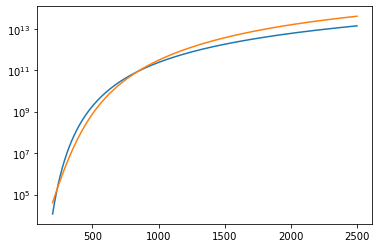

In [32]:
k1=[]
k1_2 = []
temp_list = np.arange(200,2500)
for temperature in np.arange(200,2500):
    gas.TPX = temperature,ct.one_atm,{'Ar':1}
    gas2.TPX = temperature,ct.one_atm,{'Ar':1}
    k1.append(gas.forward_rate_constants[k1_index]*1000)
    k1_2.append(gas2.forward_rate_constants[k1_index2]*1000)

plt.figure()
plt.semilogy(temp_list,k1)
plt.semilogy(temp_list,k1_2)